In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 120


In [3]:
df = pd.read_csv('data/FULL.csv', dtype = {'fips':'str'})
df.head()

,fips,mcdonalds,starbucks,target,tjs,walmart,wholefoods,Ancestry_Lithuanian_pct,In_Highschool_pct,Male_Divorced,Male_Adult_Population,Not_US_Citizen_pct,Household_income_15k_25K_pct,Male_Divorced_pct,Household_income_25k_35K_pct,GrandParents_w_Grandchildren,Ancestry_Arab_pct,Ancestry_Italian_pct,US_Citizen_pct,Ancestry_English_pct,Ancestry_Danish_pct,Ancestry_Russian_pct,Ancestry_French_pct,Over_25yrs,Ancestry_Polish_pct,Median_Household_Income,Female_Adult_Population_pct,Ancestry_Subsaharan_African_pct,Ancestry_Greek_pct,Ancestry_Swedish_pct,Male_Widowed,Highest_Education_College_pct,Female_Adult_Population,Ancestry_Swiss_pct,Ancestry_Scotch_Irish_pct,Ancestry_Ukrainian_pct,Highest_Education_Graduate_Degree_pct,Female_Single_pct,Female_Divorced_pct,Household_income_100k_150K_pct,Household_income_over200k_pct,Ancestry_Norwegian_pct,Ancestry_Dutch_pct,In_College_pct,Highest_Education_9th_pct,Ancestry_Hungarian_pct,Ancestry_German_pct,Highest_Education_Bachelors_Degree_pct,Ancestry_Czech_pct,Female_Widowed,Ancestry_Welsh_pct,Ancestry_Portuguese_pct,Household_income_50k_75K_pct,Ancestry_Slovak_pct,Female_Widowed_pct,Male_Single,Highest_Education_HS_pct,Household_income_10k_15k_pct,Highest_Education_HS_Diploma_pct,Ancestry_French_Canadian_pct,Graduated_HS_pct,Ancestry_American_pct,In_School_pct,Household_income_75k_100K_pct,Household_income_under10k_pct,Ancestry_Scottish_pct,Ancestry_Irish_pct,Highest_Education_Associates_Degree_pct,Over_25yrs_pct,Male_Widowed_pct,Female_Single,Graduated_College_pct,Household_income_35k_50K_pct,Household_income_150k_200K_pct,Female_Divorced,Ancestry_West_Indian_pct,Male_Single_pct,Male_Adult_Population_pct,GrandParents_w_Grandchildren_pct,pct_lbw,pct_smokers,pct_obese,alcohol_dri_pct,chlamydia_rate,teen_birth_rate,pct_uninsured,violent_crime_rate,pct_diabetic,hiv_prevalence_rate,household_income,population,pct_under_18,pct_65_and_over,pct_african_american,pct_american_indian_alaskan_native,pct_asian,pct_native_hawaiian_other_pacific_islander,pct_hispanic,pct_nonhispanic_white,pct_not_proficient_in_english,pct_female,pct_rural,county,state
0,06037,332.0,649.0,53.0,51.0,42.0,29.0,0.1,21.5,270624.0,3930301.0,52.0,10.7,6.9,9.7,328126.0,0.8,2.6,48.0,3.5,0.3,1.5,1.2,6557746.0,1.2,55870.0,4119016.0,1.0,0.3,0.6,80192.0,19.5,4119016.0,0.1,0.4,0.2,10.4,38.2,10.0,13.5,6.8,0.6,0.6,31.4,13.6,0.3,4.9,19.5,0.2,323679.0,0.3,0.2,16.7,0.0,7.9,1760407.0,9.6,5.9,20.5,0.2,76.8,2.8,2779216.0,11.7,6.5,0.8,4.0,6.8,6557746.0,2.0,1572494.0,29.9,12.6,6.0,410806.0,0.4,44.8,3930301.0,328126.0,7.0,12.0,21.0,27.0,510.0,32.0,24.0,474.0,11.0,550.0,55686.0,10116705.0,22.8,12.2,8.2,1.5,14.8,0.4,48.4,26.8,15.0,50.7,0.6,Los Angeles County,California
1,04013,178.0,324.0,30.0,11.0,61.0,5.0,0.2,21.0,154475.0,1520530.0,63.6,10.2,10.2,10.5,92902.0,0.6,4.6,36.4,8.3,0.6,0.9,2.4,2550592.0,2.7,53689.0,1582774.0,0.6,0.4,1.5,34033.0,25.0,1582774.0,0.3,0.7,0.2,10.7,30.0,14.0,13.4,4.6,1.8,1.3,27.4,6.4,0.4,14.5,19.2,0.4,122091.0,0.6,0.2,18.4,0.2,7.7,562929.0,7.0,4.5,23.3,0.5,86.6,6.0,1080221.0,12.3,6.9,1.7,9.3,8.4,2550592.0,2.2,474916.0,30.0,14.4,4.8,220905.0,0.2,37.0,1520530.0,92902.0,7.0,15.0,22.0,27.0,480.0,43.0,20.0,398.0,9.0,284.0,53929.0,4087191.0,25.1,13.8,5.0,2.8,4.1,0.3,30.3,57.0,5.6,50.6,2.4,Maricopa County,Arizona
2,17031,170.0,319.0,33.0,13.0,34.0,20.0,0.7,20.5,149460.0,2022673.0,53.0,10.4,7.4,9.6,137240.0,1.2,5.7,47.0,3.0,0.3,1.3,1.1,3513404.0,8.8,54828.0,2202631.0,1.0,1.0,1.4,50693.0,19.2,2202631.0,0.2,0.3,0.6,14.0,38.2,10.4,13.2,6.2,0.8,0.9,29.7,7.6,0.4,10.4,21.2,0.9,203433.0,0.2,0.1,17.1,0.3,9.2,886055.0,7.6,4.9,24.1,0.2,84.8,2.2,1384976.0,12.0,8.6,0.7,9.5,6.3,3513404.0,2.5,842185.0,35.3,12.6,5.5,228186.0,0.4,43.8,2022673.0,137240.0,9.0,16.0,25.0,38.0,661.0,39.0,18.0,631.0,10.0,608.0,55058.0,5246456.0,22.6,12.9,23.6,0.8,7.2,0.1,25.0,43.0,7.9,51.5,0.0,Cook County,Illinois
3,48201,130.0,212.0,22.0,2.0,46.0,8.0,0.1,20.5,137249.0,1619872.0,67.2,10.8,8.5,10.5,123774.0,0.7,1.9,32.8,4.8,0.1,0.4,2.0,2667930.0,1.1,53822.0,1659762.0,1.4,0.2,

In [5]:
df.shape

(2375, 104)

In [4]:
df[df.wholefoods >5].groupby('county').wholefoods.sum()

county
Arlington County        10.0
Cook County             20.0
Dallas County            7.0
Fairfax County          12.0
Fulton County            6.0
Harris County            8.0
King County             30.0
Kings County            10.0
Los Angeles County      29.0
Miami-Dade County        6.0
Middlesex County        14.0
Milwaukee County        10.0
San Francisco County     7.0
Santa Clara County       8.0
Suffolk County           6.0
Name: wholefoods, dtype: float64

In [5]:
df['Y'] = 0
df.loc[df.wholefoods>0, 'Y'] = 1

In [6]:
# NEED TO ORDER THESE COLS

use_cols = [
 'fips',
 'state',
 'county',
 'population',
 'mcdonalds',
 'starbucks',
 'target',
 'tjs',
 'walmart',
 'wholefoods',
 'Ancestry_American_pct',
 'Ancestry_Arab_pct',
 'Ancestry_Czech_pct',
 'Ancestry_Danish_pct',
 'Ancestry_Dutch_pct',
 'Ancestry_English_pct',
 'Ancestry_French_Canadian_pct',
 'Ancestry_French_pct',
 'Ancestry_German_pct',
 'Ancestry_Greek_pct',
 'Ancestry_Hungarian_pct',
 'Ancestry_Irish_pct',
 'Ancestry_Italian_pct',
 'Ancestry_Lithuanian_pct',
 'Ancestry_Norwegian_pct',
 'Ancestry_Polish_pct',
 'Ancestry_Portuguese_pct',
 'Ancestry_Russian_pct',
 'Ancestry_Scotch_Irish_pct',
 'Ancestry_Scottish_pct',
 'Ancestry_Slovak_pct',
 'Ancestry_Subsaharan_African_pct',
 'Ancestry_Swedish_pct',
 'Ancestry_Swiss_pct',
 'Ancestry_Ukrainian_pct',
 'Ancestry_Welsh_pct',
 'Ancestry_West_Indian_pct',
 'Female_Adult_Population',
 'Female_Adult_Population_pct',
 'Female_Divorced',
 'Female_Divorced_pct',
 'Female_Single',
 'Female_Single_pct',
 'Female_Widowed',
 'Female_Widowed_pct',
 'In_College_pct',
 'In_Highschool_pct',
 'In_School_pct',
 'Graduated_College_pct',
 'Graduated_HS_pct',
 'GrandParents_w_Grandchildren',
 'GrandParents_w_Grandchildren_pct',
 'Highest_Education_9th_pct',
 'Highest_Education_Associates_Degree_pct',
 'Highest_Education_Bachelors_Degree_pct',
 'Highest_Education_College_pct',
 'Highest_Education_Graduate_Degree_pct',
 'Highest_Education_HS_Diploma_pct',
 'Highest_Education_HS_pct',
 'Household_income_100k_150K_pct',
 'Household_income_10k_15k_pct',
 'Household_income_150k_200K_pct',
 'Household_income_15k_25K_pct',
 'Household_income_25k_35K_pct',
 'Household_income_35k_50K_pct',
 'Household_income_50k_75K_pct',
 'Household_income_75k_100K_pct',
 'Household_income_over200k_pct',
 'Household_income_under10k_pct',
 'Male_Adult_Population',
 'Male_Adult_Population_pct',
 'Male_Divorced',
 'Male_Divorced_pct',
 'Male_Single',
 'Male_Single_pct',
 'Male_Widowed',
 'Male_Widowed_pct',
 'Median_Household_Income',
 'Over_25yrs',
 'Over_25yrs_pct',
 'US_Citizen_pct',
 'Not_US_Citizen_pct',
 'alcohol_dri_pct',
 'chlamydia_rate',
 'hiv_prevalence_rate',
 'household_income',
 'pct_65_and_over',
 'pct_african_american',
 'pct_american_indian_alaskan_native',
 'pct_asian',
 'pct_diabetic',
 'pct_female',
 'pct_hispanic',
 'pct_lbw',
 'pct_native_hawaiian_other_pacific_islander',
 'pct_nonhispanic_white',
 'pct_not_proficient_in_english',
 'pct_obese',
 'pct_rural',
 'pct_smokers',
 'pct_under_18',
 'pct_uninsured',
 'teen_birth_rate',
 'violent_crime_rate',
 'Y']
  

In [7]:
df = df[use_cols]

## FILL NAS

Index([u'chlamydia_rate', u'hiv_prevalence_rate', u'pct_lbw',
       u'teen_birth_rate', u'violent_crime_rate'],
      dtype='object')


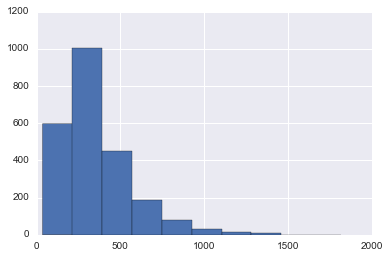

In [8]:
print(df.columns[df.isnull().any()]) # only 5 columns have very few nulls wow!


df.chlamydia_rate.hist()
df.chlamydia_rate.median()
df.chlamydia_rate.mean()


# it's per 100k people... so county size shouldn't matter
df.fillna({'chlamydia_rate':df.chlamydia_rate.median()}, inplace = True);

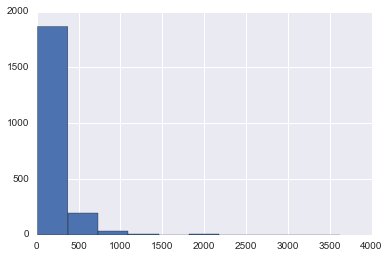

In [9]:
df.hiv_prevalence_rate.hist()
df.hiv_prevalence_rate.median()
df.hiv_prevalence_rate.mean()

df.fillna({'hiv_prevalence_rate': df.hiv_prevalence_rate.median()}, inplace = True);



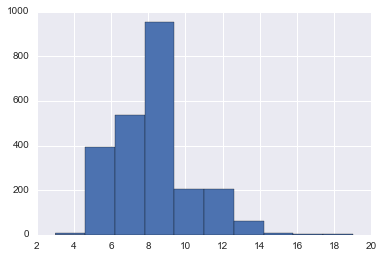

In [10]:
df.pct_lbw.hist()
df.pct_lbw.mean()
df.pct_lbw.median()


df.fillna({'pct_lbw': df.pct_lbw.median()}, inplace = True);




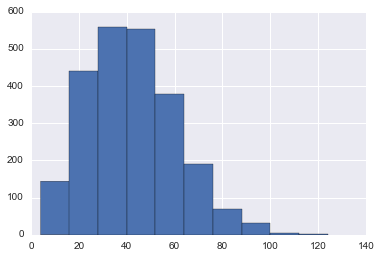

In [11]:
df.teen_birth_rate.hist()
# PER 1,000 teen females
df.teen_birth_rate.median()
df.teen_birth_rate.mean()


df.fillna({'teen_birth_rate': df.teen_birth_rate.median()}, inplace = True);


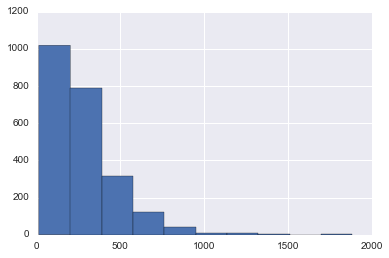

In [12]:
df.violent_crime_rate.hist()
# PER 100,000 PPL
df.violent_crime_rate.mean()
df.violent_crime_rate.median()


df.fillna({'violent_crime_rate': df.violent_crime_rate.median()}, inplace = True);


In [13]:
df.isnull().sum().any()

False

## MAKE ME A MODEL!

In [14]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import dbscan, KMeans


from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV

In [15]:
x = df.drop(['fips','wholefoods','county','state','fips', 'Y'], axis = 1)
x_scaled = MinMaxScaler().fit_transform(x)
y = df.Y

In [16]:
print(y.value_counts())


186/2189. # y makes up 8.5% of data

0    2189
1     186
Name: Y, dtype: int64


0.08497030607583371

In [17]:
drop = ['fips','state','county','wholefoods','Y']
# weights so we oversample counties with wholefoods
weights = [0.3 if v == 0 else 0.7 for v in df.Y]
len(weights) #2375
weights.count(0.9) # great

# THIS WILL BE HOW I GET A TRAINING SET
# use replacement and weights to over sample walmart
samp = df.sample(1500, weights = weights, replace=True)
samp.Y.value_counts()
samp[samp.Y == 1].index.nunique()

127

In [18]:
# TEST SET
df[~df.index.isin(samp.index)].shape
df[~df.index.isin(samp.index)].Y.value_counts()


0    1232
1      59
Name: Y, dtype: int64

## LOGISTIC REGRESSION

In [19]:

l1 = LogisticRegression(penalty = 'l1', C = 0.01, max_iter=1000)
l2 = LogisticRegression(C = 0.01, max_iter=1000)



l1_accuracy = []
l1_pr = []
l1_auc = []
l2_accuracy = []
l2_pr = []
l2_auc = []


l1coefs = []
l2coefs = []


for cv in range(50):
    train = df.sample(1500, weights = weights, replace=True)
    test = df[~df.index.isin(train.index)]
    x = train.drop(drop, axis =1)
    x_train = x
    y_train =train.Y
    
    x_test = test.drop(drop, axis = 1)
    y_test = test.Y
    
    #print(y_test.value_counts())
    
    l1.fit(x_train,y_train)
    l2.fit(x_train,y_train)
    l1_preds = l1.predict(x_test)
    l1_probs = l1.predict_proba(x_test)
    l2_preds = l2.predict(x_test)
    l2_probs = l2.predict_proba(x_test)
    
    l1_accuracy.append(metrics.accuracy_score(y_test, l1_preds))
    l1_pr.append((metrics.precision_score(y_test, l1_preds), metrics.recall_score(y_test,l1_preds)))
    l1_auc.append(metrics.roc_auc_score(y_test, l1_probs[:,1]))
    
    l2_accuracy.append(metrics.accuracy_score(y_test, l2_preds))
    l2_pr.append((metrics.precision_score(y_test, l2_preds), metrics.recall_score(y_test,l2_preds)))
    l2_auc.append(metrics.roc_auc_score(y_test, l2_probs[:,1]))
    
    l1coefs.append(l1.coef_)
    l2coefs.append(l2.coef_)


In [20]:
print('L1 \n --------------')
print('Accuracy:',np.mean(l1_accuracy))
print('Precision:',np.array(l1_pr)[:,0].mean())
print('Recall:', np.array(l1_pr)[:,1].mean())
print('AUC:', np.mean(l1_auc))
print('\n\n')
print('L2 \n --------------')
print('Accuracy:', np.mean(l2_accuracy))
print('Precision:', np.array(l2_pr)[:,0].mean())
print('Recall:', np.array(l2_pr)[:,1].mean())
print('AUC:', np.mean(l2_auc))

L1 
 --------------
('Accuracy:', 0.96636738839636538)
('Precision:', 0.54080904231400617)
('Recall:', 0.78292580764342157)
('AUC:', 0.974530807917105)



L2 
 --------------
('Accuracy:', 0.96532312895072758)
('Precision:', 0.53009833977850551)
('Recall:', 0.7864154643010367)
('AUC:', 0.97334460055646332)


In [21]:
# just as a reference here's training scores on itself.
s = df.drop(drop, axis = 1)
l1_preds = l1.predict(s)
l1_probs = l1.predict_proba(df.drop(drop, axis =1))

print metrics.classification_report(df.Y, l1_preds)


res = pd.DataFrame({'Preds': l1_preds, 'Prob0': l1_probs[:,0], 'Prob1': l1_probs[:,1]})
res = pd.concat([df.Y, res], axis = 1)


             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2189
          1       0.74      0.79      0.76       186

avg / total       0.96      0.96      0.96      2375



In [22]:
l1coefs = pd.DataFrame(np.array(l1coefs).reshape(50,100), columns = df.drop(drop, axis = 1).columns)
l2coefs = pd.DataFrame(np.array(l2coefs).reshape(50,100), columns = df.drop(drop, axis = 1).columns)

# SUBSET OF COLUMNS THAT WEREN'T ZEROED OUT BY L1
l1Keep_cols = l1coefs.mean()[np.abs(l1coefs.mean())>0].index
l1coefs.mean()[np.abs(l1coefs.mean())>0].sort_values()

# +STARBUCKS + COLLEGE GRAD - OBESE - RURAL= WHOLEFOODS... maybe - low correlations

pct_obese                          -0.090337
pct_rural                          -0.031607
pct_nonhispanic_white              -0.027435
Highest_Education_HS_Diploma_pct   -0.013605
Ancestry_German_pct                -0.009427
US_Citizen_pct                     -0.007523
pct_hispanic                       -0.007403
teen_birth_rate                    -0.002628
Male_Widowed                       -0.001324
chlamydia_rate                     -0.000891
mcdonalds                          -0.000525
Male_Single                        -0.000217
alcohol_dri_pct                    -0.000215
Graduated_HS_pct                   -0.000148
GrandParents_w_Grandchildren       -0.000114
GrandParents_w_Grandchildren_pct   -0.000111
In_College_pct                     -0.000101
Median_Household_Income            -0.000094
Male_Divorced                      -0.000065
Over_25yrs_pct                     -0.000035
Over_25yrs                         -0.000034
Female_Adult_Population_pct        -0.000029
Female_Adu

In [23]:
l2coefs.mean()[np.abs(l2coefs.mean())>0].sort_values()

pct_obese                                    -0.038396
pct_rural                                    -0.035376
pct_nonhispanic_white                        -0.029053
Highest_Education_HS_Diploma_pct             -0.027347
Ancestry_German_pct                          -0.021598
US_Citizen_pct                               -0.018287
pct_hispanic                                 -0.012586
pct_under_18                                 -0.012136
teen_birth_rate                              -0.009996
Highest_Education_HS_pct                     -0.007352
Ancestry_Norwegian_pct                       -0.006486
Household_income_15k_25K_pct                 -0.006454
Ancestry_American_pct                        -0.005995
mcdonalds                                    -0.005850
Highest_Education_College_pct                -0.005356
In_Highschool_pct                            -0.005186
pct_african_american                         -0.005135
Female_Widowed_pct                           -0.004564
pct_diabet

In [24]:
def Oversample_Classification(est, data, drop, target, weights, cv, train_size):
    '''
    Does Cross_Validation with oversampling.
    data is your dataframe
    drop is columns to drop to get your x variable
    target is your y variable
    weights should be a series that maps to x and y the weight for each row 
    (eg all the rows of class one should have distinct weight and all rows of class2 have other distinct weight)
    '''

    accuracy = []
    pr = []
    auc = []
    ftr_importances = []


    for f in range(cv):
        train = data.sample(train_size, weights = weights, replace=True)
        test = data[~data.index.isin(train.index)]
        x = train.drop(drop, axis =1)
        x_train  = x
        y_train = train[target]

        x_test = test.drop(drop, axis = 1)
        y_test = test[target]

        est.fit(x_train,y_train)
        preds = est.predict(x_test)
        probs = est.predict_proba(x_test)

        
        accuracy.append(metrics.accuracy_score(y_test, preds))
        pr.append((metrics.precision_score(y_test, preds), metrics.recall_score(y_test,preds)))
        auc.append(metrics.roc_auc_score(y_test, probs[:,1]))
        
        try: 
            ftr_importances.append(est.coef_)
        except:
            try:
                ftr_importances.append(est.feature_importances_)
            except:
                ftr_importances = 'no ftr_importances'
            
       
    print('--------------')
    print('Accuracy:',np.mean(accuracy))
    print('Precision:',np.array(pr)[:,0].mean())
    print('Recall:', np.array(pr)[:,1].mean())
    print('AUC:',np.mean(auc))
    print('--------------')

       
                
    print(np.array(ftr_importances).shape)
    if type(ftr_importances) == str:
        return ftr_importances
    
    
    
    return pd.DataFrame(np.array(ftr_importances).reshape(cv,len(data.drop(drop, axis = 1).columns)), columns = data.drop(drop, axis = 1).columns)

## Naive Bayes

In [25]:
nb = GaussianNB()
# suprisingly good
Oversample_Classification(nb, df, drop, 'Y', weights, 50, 1500);

--------------
('Accuracy:', 0.96295236870972156)
('Precision:', 0.52004466228169388)
('Recall:', 0.73450991506625729)
('AUC:', 0.89934707261444158)
--------------
()


## FORESTS

In [29]:
rfor = RandomForestClassifier(n_estimators=50,max_depth = 25, max_features=0.5)

In [30]:
rfor_importances = Oversample_Classification(rfor,df,drop,'Y', weights, 50, 1500)

--------------
('Accuracy:', 0.96869171066931758)
('Precision:', 0.57209346768242098)
('Recall:', 0.82565505031569031)
('AUC:', 0.9825230269349724)
--------------
(50, 100)


In [28]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=400, learning_rate=0.8)
ada_importances = Oversample_Classification(ada, df, drop, 'Y', weights, 50,1500)

--------------
('Accuracy:', 0.96990906358485096)
('Precision:', 0.58197772110436796)
('Recall:', 0.79678346751752993)
('AUC:', 0.98103492265374836)
--------------
(50, 100)


In [33]:
gboost1 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=50, max_depth = 4, max_features=25)
gboost2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=50, max_depth = 3, max_features=25)
gboost3 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=50, max_depth = 10, max_features=10)

gb1_importances = Oversample_Classification(gboost1, df, drop, 'Y', weights, 50,1500)
print('\n')
gb2_importances = Oversample_Classification(gboost2, df, drop, 'Y', weights, 50,1500)
print('\n')
gb3_importances = Oversample_Classification(gboost3, df, drop, 'Y', weights, 50,1500)


--------------
('Accuracy:', 0.96840996729477424)
('Precision:', 0.56439724569550409)
('Recall:', 0.81724538906947897)
('AUC:', 0.98298991492270471)
--------------
(50, 100)


--------------
('Accuracy:', 0.96890417859870803)
('Precision:', 0.56621190172483238)
('Recall:', 0.84041463896890756)
('AUC:', 0.98538331895328513)
--------------
(50, 100)


--------------
('Accuracy:', 0.97211392278893083)
('Precision:', 0.60153729198145278)
('Recall:', 0.78068351556750126)
('AUC:', 0.98295186103644994)
--------------
(50, 100)


In [39]:
keep_cols1 = gb2_importances.mean()[np.abs(gb2_importances.mean())>0.01].sort_values(ascending=False).index.tolist()

In [40]:
keep_cols2 = gb3_importances.mean()[np.abs(gb1_importances.mean())>0.01].sort_values(ascending=False).index.tolist()

In [41]:
print(len(keep_cols1))#28
print(len(keep_cols2))#27

# SAVE THESE AS A SUBSET OF FEATURES FOR USE IN SMALLER MODEL
keep_cols = set(keep_cols1) | set(keep_cols2)
print(len(keep_cols))#29

print('\n ------------------')
# features that are in one but not the other
print([a for a in keep_cols1 if a not in keep_cols2]) # ['Ancestry_Arab_pct', 'pct_female', 'pct_smokers']
print([a for a in keep_cols2 if a not in keep_cols1]) # ['Household_income_75k_100K_pct', 'hiv_prevalence_rate', 'mcdonalds']



30
24
30

 ------------------
['Ancestry_Arab_pct', 'walmart', 'Ancestry_American_pct', 'mcdonalds', 'hiv_prevalence_rate', 'Household_income_over200k_pct']
[]


In [43]:
# JUST LOOKIING AT ONE EXAMPLE TO TRY TO GET A HANG ON WHATS GOING ON
# THIS IS LIKE ONE SINGLE CROSS VALIDATION ROUND
train = df.sample(1500, weights = weights, replace = True)
train.Y.value_counts()

train.Y.sum() #235 class1

train[train.Y == 1].index.nunique() # 130 unique 1s...

test = df[~df.index.isin(train.index)]
test.Y.value_counts()# 50 class1




x_train = train.drop(drop, axis = 1)
y_train = train.Y

x_test = test.drop(drop, axis = 1)
y_test = test.Y

gboost3.fit(x_train,y_train)
preds = gboost3.predict(x_test)
probs = gboost3.predict_proba(x_test)


print('Accuracy:', metrics.accuracy_score(y_test, preds))
print('AUC:', metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, preds))

('Accuracy:', 0.97380585516178741)
('AUC:', 0.97527821939586645)
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1258
          1       0.55      0.78      0.65        40

avg / total       0.98      0.97      0.98      1298



## K-NEAREST NEIGHBORS

In [44]:
knn1 = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn2 = KNeighborsClassifier(n_neighbors=150, weights='distance')
knn3 = KNeighborsClassifier(n_neighbors=200, weights='distance')


knn1_importances = Oversample_Classification(knn1, df, drop, 'Y', weights, 50,1500)
knn2_importances = Oversample_Classification(knn2, df, drop, 'Y', weights, 50,1500)
knn3_importances = Oversample_Classification(knn2, df, drop, 'Y', weights, 50,1500)

--------------
('Accuracy:', 0.95654648174892887)
('Precision:', 0.45910797699555067)
('Recall:', 0.76301740638184778)
('AUC:', 0.96646606669354229)
--------------
()
--------------
('Accuracy:', 0.95502856711387807)
('Precision:', 0.45205447454795944)
('Recall:', 0.73903741005392465)
('AUC:', 0.96541709475272031)
--------------
()
--------------
('Accuracy:', 0.95680037670409079)
('Precision:', 0.45946865770216833)
('Recall:', 0.76419694889921597)
('AUC:', 0.96967406352248942)
--------------
()


In [46]:
train = df.sample(1500, weights = weights, replace=True)
train.Y.value_counts() # 261 c1

train[train.Y==1].index.nunique() # 136 unique


test = df[~df.index.isin(train.index)]
test.Y.value_counts()# 50 class1

# IT DOES BETTER WITH SMALLER SCALES
x_train = train.drop(drop, axis = 1)
y_train = train.Y

x_test = test.drop(drop, axis = 1)
y_test = test.Y

knn2.fit(x_train,y_train)
preds = knn2.predict(x_test)
probs = knn2.predict_proba(x_test)


print('Accuracy:', metrics.accuracy_score(y_test, preds))
print('AUC:', metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, preds))

('Accuracy:', 0.95826893353941267)
('AUC:', 0.96283909327387585)
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1242
          1       0.49      0.75      0.59        52

avg / total       0.97      0.96      0.96      1294



### TRY GBOOST, KMEANS AND NB WITH ONLY KEEP_COLUMNS

In [47]:
# GET RID OF ALL COLUMNS EXCEPT FOR THOSE IN KEEP_COLS
big_drop = [c for c in df.columns if c not in keep_cols]

Oversample_Classification(nb, df, big_drop, 'Y', weights, 50, 1500);
Oversample_Classification(knn2, df, big_drop, 'Y', weights, 50,1500)
Oversample_Classification(gboost3, df, big_drop, 'Y', weights, 50, 1500);

--------------
('Accuracy:', 0.96262536655646114)
('Precision:', 0.50925580076952681)
('Recall:', 0.70656474761609256)
('AUC:', 0.90636306557131918)
--------------
()
--------------
('Accuracy:', 0.95521299863854414)
('Precision:', 0.44826530391489816)
('Recall:', 0.76363977053286347)
('AUC:', 0.95791795063225893)
--------------
()
--------------
('Accuracy:', 0.97088030186819252)
('Precision:', 0.5953700410520919)
('Recall:', 0.76686671682837793)
('AUC:', 0.9816777543978884)
--------------
(50, 30)


## TRY BOTH WITH L1 SELECTED COLUMNS

In [48]:
print len(keep_cols) 
print len(l1Keep_cols)
print(len(set(keep_cols)|set(l1Keep_cols)))
print('-------------------------\n')
print(sorted([a for a in keep_cols if a not in l1Keep_cols]))
print('-------------------------\n')
print(sorted([a for a in l1Keep_cols if a not in keep_cols]))

30
37
47
-------------------------

['Ancestry_American_pct', 'Ancestry_Arab_pct', 'Highest_Education_Associates_Degree_pct', 'Highest_Education_Bachelors_Degree_pct', 'Highest_Education_Graduate_Degree_pct', 'Household_income_75k_100K_pct', 'Household_income_over200k_pct', 'pct_native_hawaiian_other_pacific_islander', 'tjs', 'walmart']
-------------------------

['Ancestry_German_pct', 'Female_Widowed', 'Graduated_HS_pct', 'GrandParents_w_Grandchildren', 'GrandParents_w_Grandchildren_pct', 'In_College_pct', 'Male_Widowed', 'Median_Household_Income', 'US_Citizen_pct', 'alcohol_dri_pct', 'chlamydia_rate', 'household_income', 'pct_african_american', 'pct_hispanic', 'pct_nonhispanic_white', 'teen_birth_rate', 'violent_crime_rate']


In [49]:
l1_drop = [a for a in df.columns if a not in l1Keep_cols]


Oversample_Classification(nb, df, l1_drop, 'Y', weights, 50, 1500);
Oversample_Classification(knn2, df, l1_drop, 'Y', weights, 50,1500)
Oversample_Classification(gboost3, df, l1_drop, 'Y', weights, 50, 1500);

--------------
('Accuracy:', 0.96146243198367354)
('Precision:', 0.50623163689234152)
('Recall:', 0.72752119917574054)
('AUC:', 0.89497178514600206)
--------------
()
--------------
('Accuracy:', 0.95674881613812157)
('Precision:', 0.46825657910580615)
('Recall:', 0.76299335317147265)
('AUC:', 0.96625441526297318)
--------------
()
--------------
('Accuracy:', 0.97044509427928194)
('Precision:', 0.58802384600128998)
('Recall:', 0.75326071718166432)
('AUC:', 0.97621816646325432)
--------------
(50, 37)


### Gboost2 and 3 with drop/big_drop/l1_drog

In [51]:
print 'Drop:\n'
Oversample_Classification(gboost2, df, drop, 'Y', weights, 50, 1500);
Oversample_Classification(gboost3, df, drop, 'Y', weights, 50, 1500);

print 'Big Drop:\n'
Oversample_Classification(gboost2, df, big_drop, 'Y', weights, 50, 1500);
Oversample_Classification(gboost3, df, big_drop, 'Y', weights, 50, 1500); # WE WANT THIS ONE


print 'L1 Drop:\n'
Oversample_Classification(gboost2, df, l1_drop, 'Y', weights, 50, 1500);
Oversample_Classification(gboost3, df, l1_drop, 'Y', weights, 50, 1500);


Drop:

--------------
('Accuracy:', 0.9698076858321022)
('Precision:', 0.57033316095374964)
('Recall:', 0.82436973218244003)
('AUC:', 0.98263829832025096)
--------------
(50, 100)
--------------
('Accuracy:', 0.97274365783450223)
('Precision:', 0.6156674137850483)
('Recall:', 0.7712033908447955)
('AUC:', 0.97940028535961932)
--------------
(50, 100)
Big Drop:

--------------
('Accuracy:', 0.96743215635769308)
('Precision:', 0.55941623213748526)
('Recall:', 0.80741838290589907)
('AUC:', 0.97976340204245316)
--------------
(50, 30)
--------------
('Accuracy:', 0.97141709268096266)
('Precision:', 0.59853766468683212)
('Recall:', 0.76834459250726317)
('AUC:', 0.97863071694427672)
--------------
(50, 30)
L1 Drop:

--------------
('Accuracy:', 0.96654699742930816)
('Precision:', 0.55065378815736077)
('Recall:', 0.81967145030712796)
('AUC:', 0.98113415194365705)
--------------
(50, 37)
--------------
('Accuracy:', 0.96954776236561946)
('Precision:', 0.57949427535009912)
('Recall:', 0.76794322

GOING WITH GBOOST3 BIG DROP

In [397]:
import pickle 

In [398]:
with open('pickles/df.pkl', 'wb') as f:
    pickle.dump(df, f, 2)

with open('pickles/drop_cols1.pkl', 'wb') as f:
    pickle.dump(big_drop, f, 2)

with open('pickles/gboost3.pkl', 'wb') as f:
    pickle.dump(gboost3, f, 2)

In [52]:
pwd

u'/Users/RickS/Desktop/rickMETIS03WHOLEFOODS'